In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('data/all_stocks_5yr.csv', parse_dates=True)

In [173]:
df.shape

(619040, 7)

(619040, 7)

(619040, 7)

In [174]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [175]:
sbux = df[df['Name'] == 'SBUX'].copy()
sbux.head()


,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


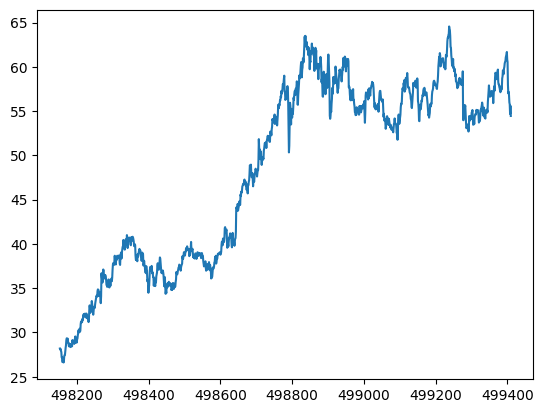

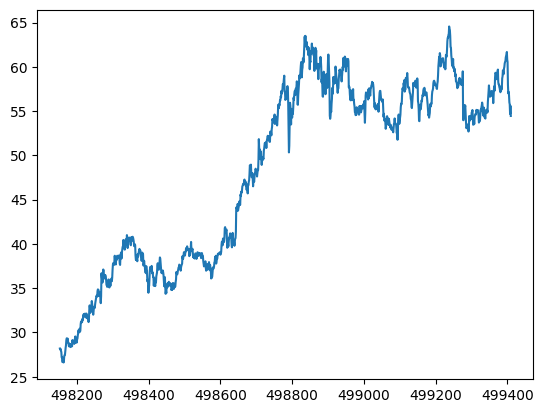

In [176]:
sbux['close'].plot();

In [177]:
sbux['prev_close'] = sbux['close'].shift(1)

In [178]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [179]:
sbux['return'] = (sbux['close'] / sbux['prev_close']) - 1

In [180]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [181]:
sbux['return2'] = sbux['close'].pct_change(1)

In [182]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


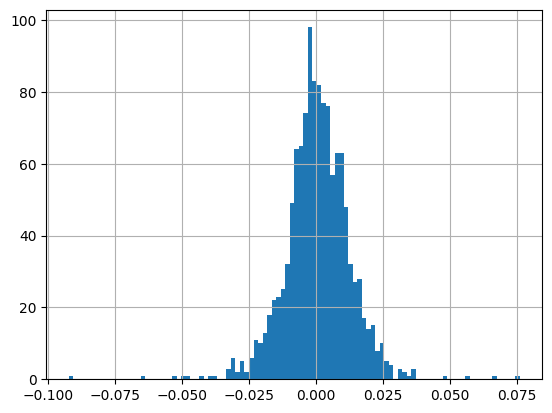

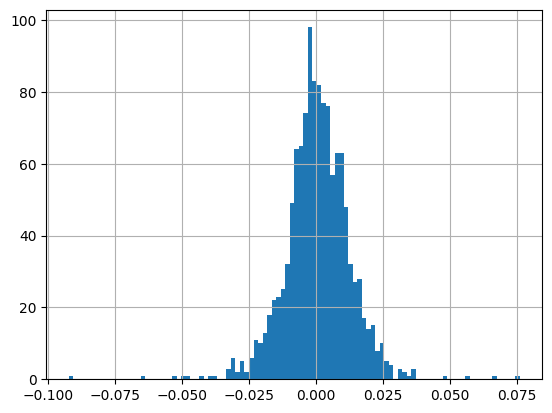

In [183]:
sbux['return'].hist(bins=100);

In [184]:

sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [185]:
sbux['log_return'] = np.log(sbux['return'] + 1)

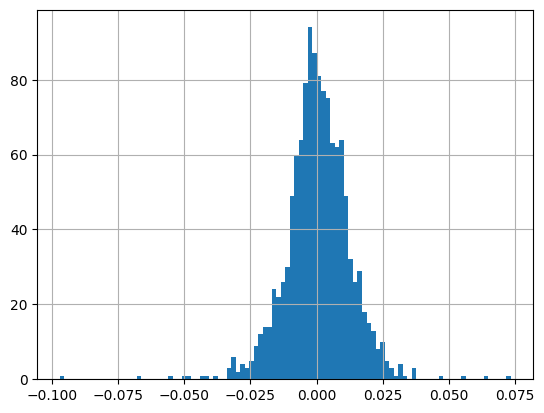

In [186]:
sbux['log_return'].hist(bins=100);

In [187]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

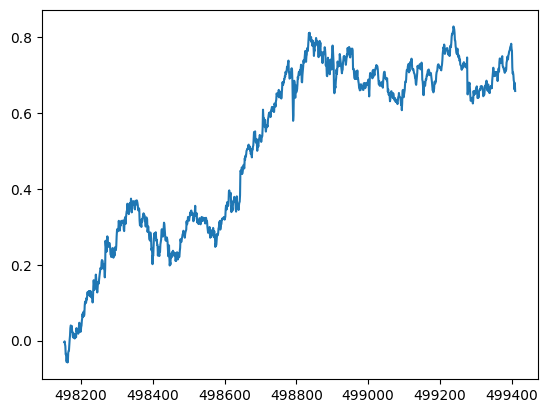

In [188]:
sbux['log_return'].cumsum().plot();

In [189]:
## QQ Plot

In [190]:
from scipy.stats import norm

In [191]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [192]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

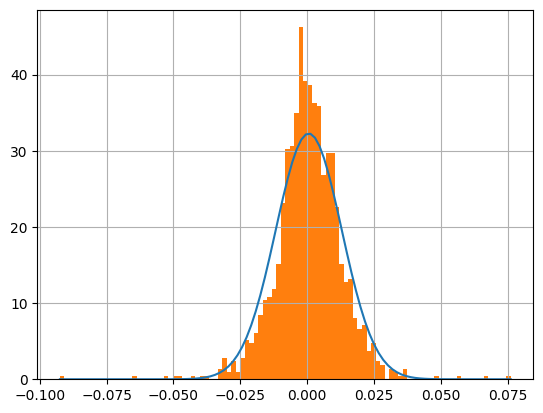

In [193]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [194]:
from scipy.stats import probplot


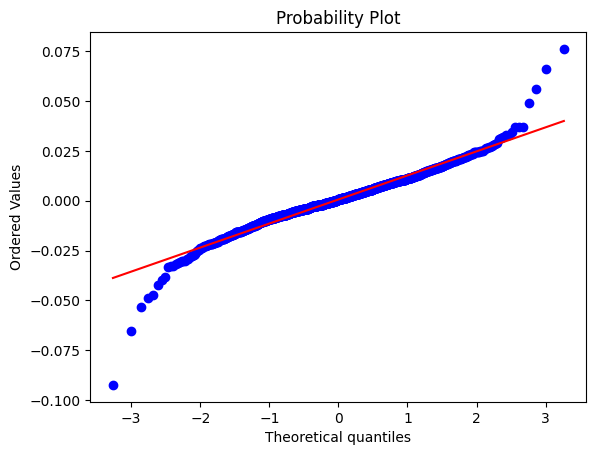

In [195]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

In [196]:
import statsmodels.api as sm

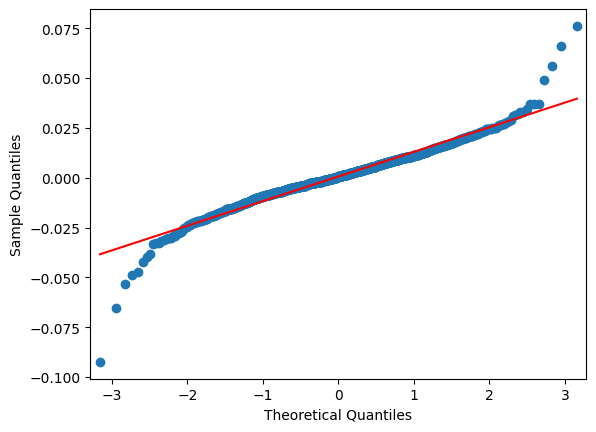

In [197]:
sm.qqplot(sbux['return'].dropna(), line='s');

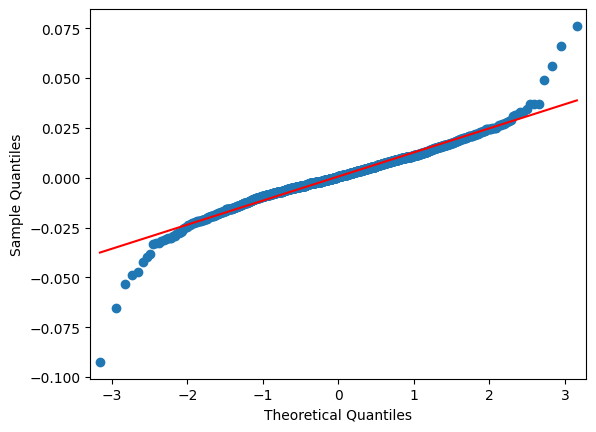

In [198]:
sm.qqplot(sbux['return'].dropna(), line='r');

In [199]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [200]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

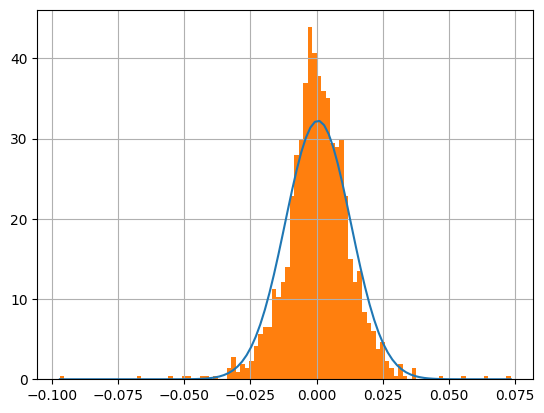

In [201]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);


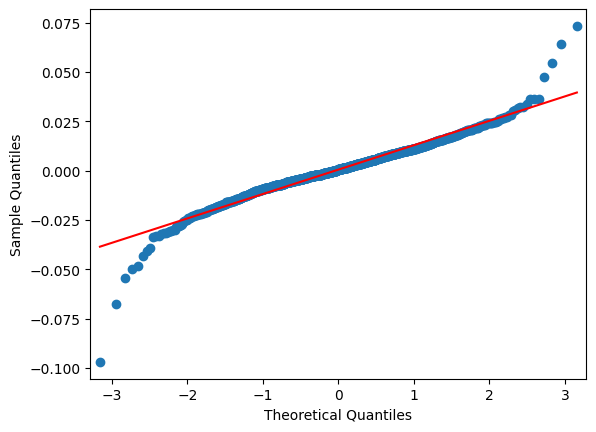

In [202]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

In [203]:
## The t-distribution

In [204]:
from scipy.stats import t # careful!

In [205]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [206]:
params = t.fit(sbux['return'].dropna())

In [207]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [208]:
df, loc, scale = params

In [209]:
y_list = t.pdf(x_list, df, loc, scale)

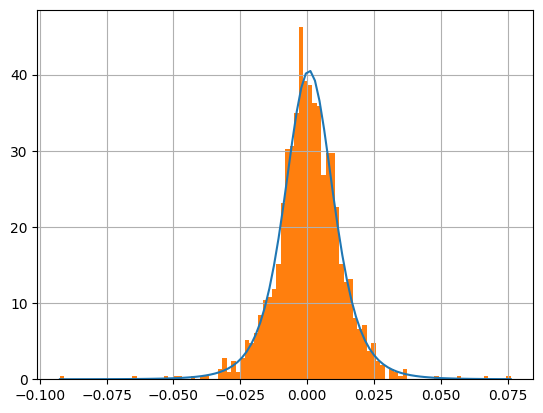

In [210]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [211]:
# sm.qqplot(sbux['return'].dropna(), dist=t, line='s'); #vai retornar erro

In [212]:
# probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt); # vai retornar erro

In [213]:
class myt:
  def __init__(self, df):
    self.df = df

  def fit(self, x):
    return t.fit(x)

  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

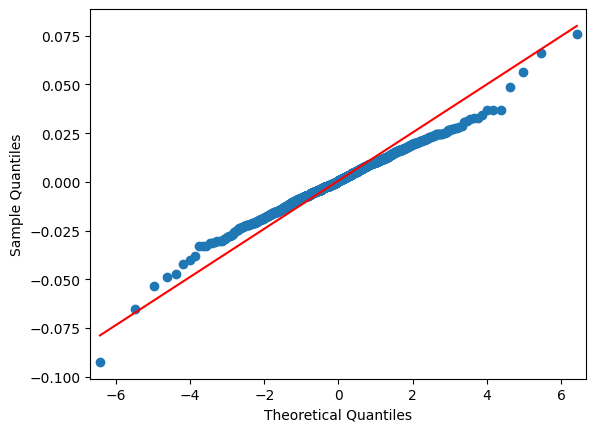

In [214]:
sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s');

In [215]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [216]:
params = t.fit(sbux['log_return'].dropna())
params

(4.75336721921499, 0.0006969522085244113, 0.009324468516575219)

In [217]:
df, loc, scale = params

In [218]:
y_list = t.pdf(x_list, df, loc, scale)

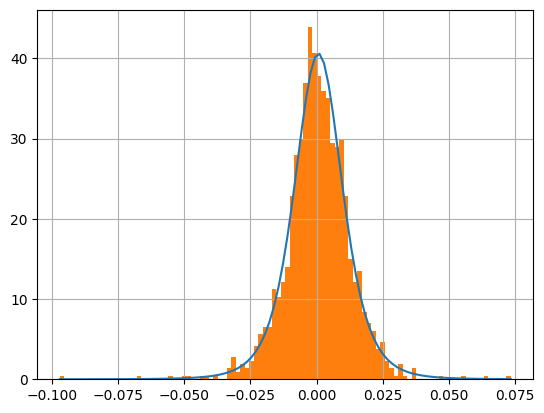

In [219]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

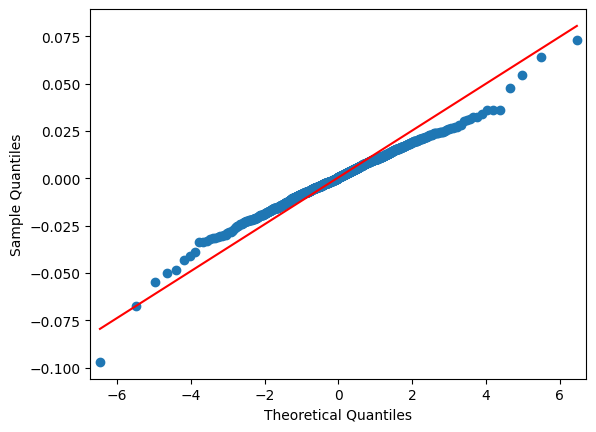

In [220]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

In [221]:
## Skewness e Kurtosis

In [222]:
sbux['return'].skew()

-0.2680784195824153

In [223]:
sbux['return'].kurtosis()

5.593158903424731

In [224]:
sbux['log_return'].skew()

-0.41015501490182066

In [225]:
sbux['log_return'].kurtosis()

5.964502225799283

In [226]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.019413927481768043, -0.05504193686904468)

In [227]:
## Confidence Interval

In [228]:
values = sbux['return'].dropna().to_numpy()

In [229]:
m = values.mean()
s = values.std(ddof=1)

In [230]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

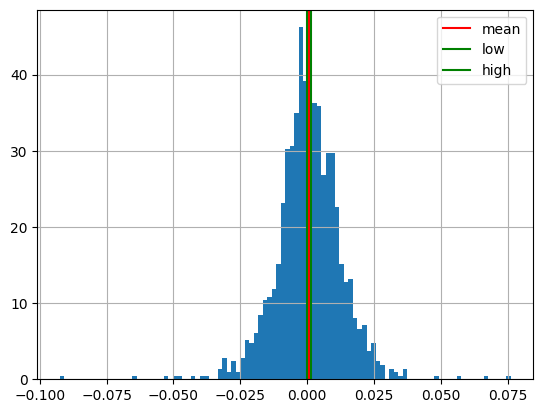

In [231]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

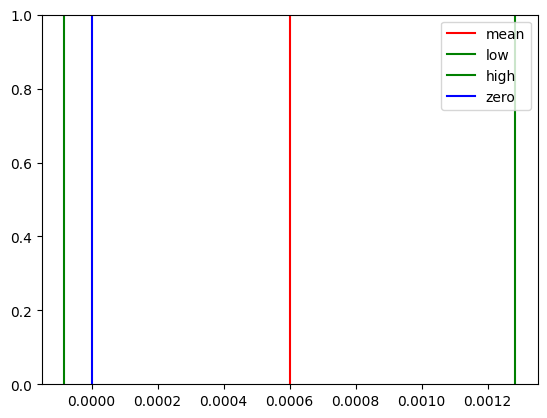

In [232]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

In [233]:
## Stat tests

In [234]:
from scipy.stats import jarque_bera, normaltest

In [235]:
jarque_bera(values)

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)

In [236]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [237]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [238]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [239]:
from scipy.stats import kstest

In [240]:
df, loc, scale = t.fit(values)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

In [241]:
from scipy.stats import ttest_1samp

In [242]:
ttest_1samp(values, 0)

TtestResult(statistic=1.7223010261810556, pvalue=0.08526098717694539, df=1257)

In [243]:
ttest_1samp(sbux['log_return'].dropna(), 0)

TtestResult(statistic=1.4999195047533647, pvalue=0.13388636615667793, df=1257)

In [244]:
data = df = pd.read_csv('data/all_stocks_5yr.csv', parse_dates=True)

In [245]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [246]:
mmm = data[data['Name'] == 'MMM'].copy()

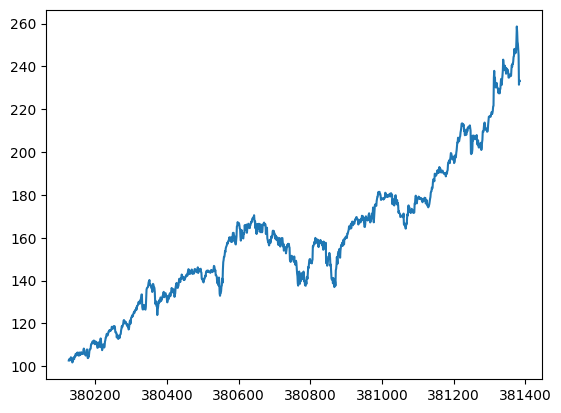

In [247]:
mmm['close'].plot();

In [248]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [249]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

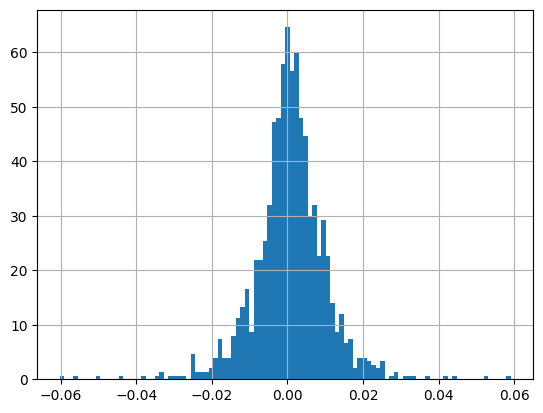

In [250]:
mmm['return'].hist(bins=100, density=True);

In [251]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


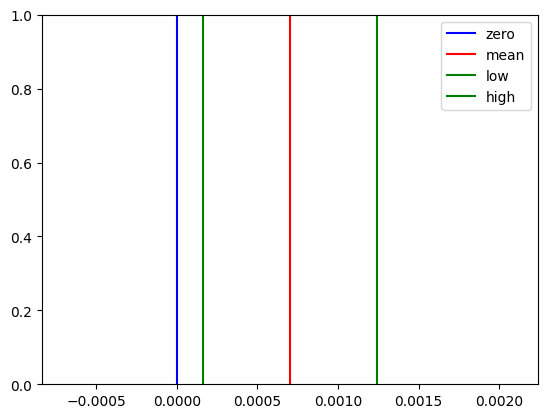

In [252]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

In [253]:
ttest_1samp(mmm['return'].dropna(), 0)

TtestResult(statistic=2.541991701703365, pvalue=0.011141496531324404, df=1257)

In [254]:
ttest_1samp(mmm['log_return'].dropna(), 0)

TtestResult(statistic=2.365963115873947, pvalue=0.018134246809755054, df=1257)

In [255]:
## Covariance and Correlation

In [256]:
close = pd.read_csv('data/sp500_close.csv')

In [257]:
close.head()

,Unnamed: 0,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
4,2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


975

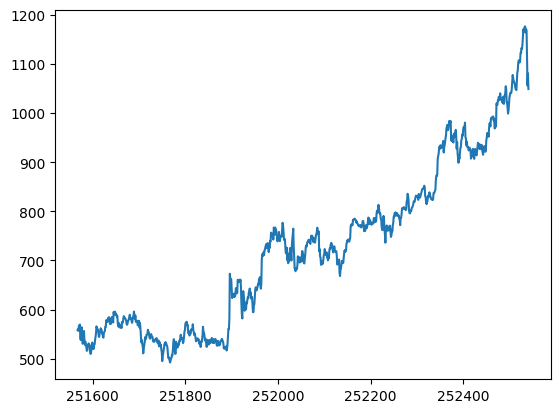

In [258]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot();
len(goog)

In [259]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [260]:
sub.dropna(axis=0, how='all', inplace=True)

In [261]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [262]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [263]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [264]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


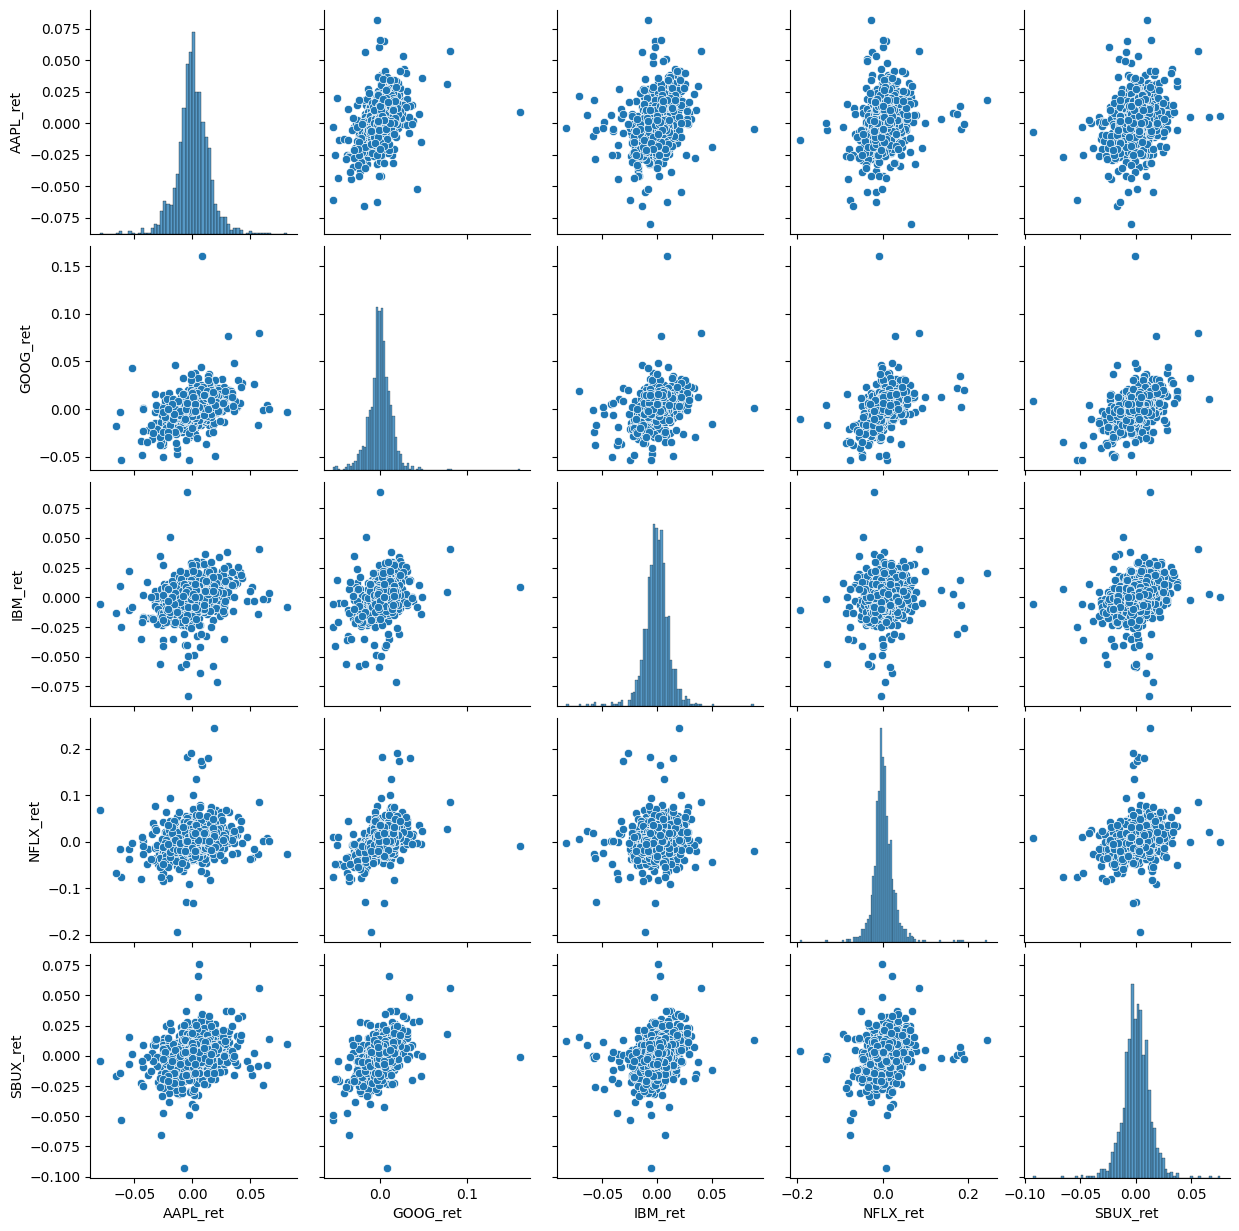

In [265]:
import seaborn as sns
sns.pairplot(rets);

In [266]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [267]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

In [268]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [269]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


In [270]:
## Alpha and BEta

In [271]:
spy = pd.read_csv('data/SPY.csv', index_col=0, parse_dates=True)
spy.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,88.454193,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,88.688339,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,88.750786,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,89.125450,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,89.422028,126402800


In [272]:
spy['SPY'] = spy['Close'].pct_change(1)

In [274]:
index = pd.read_csv('data/sp500sub.csv', index_col=0, parse_dates=True)

In [275]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [276]:
aapl['AAPL'] = aapl['Close'].pct_change(1)


In [277]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [278]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


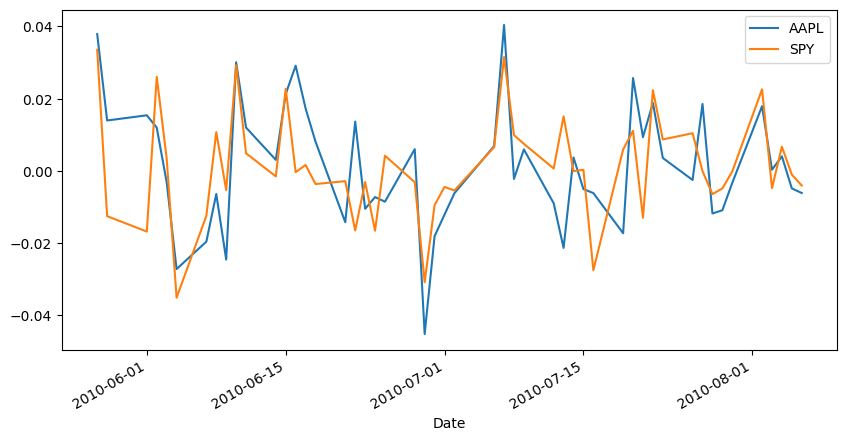

In [279]:
joined.iloc[100:150].plot(figsize=(10, 5));

<Axes: xlabel='SPY', ylabel='AAPL'>

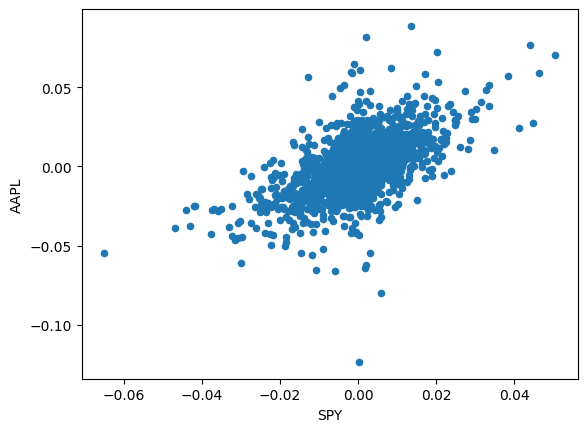

In [280]:
joined.plot.scatter('SPY', 'AAPL')

In [281]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [282]:
X.shape, Y.shape

((2262, 1), (2262, 1))

In [284]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [285]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

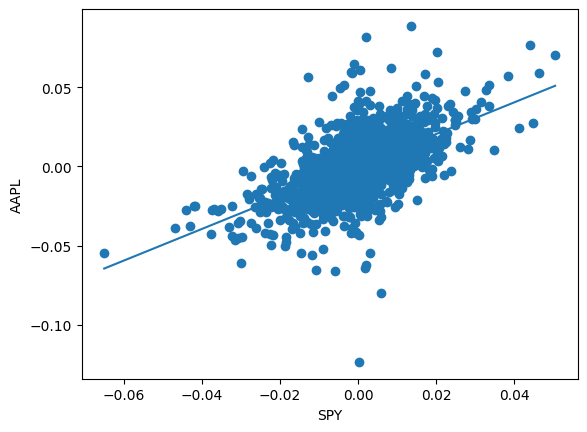

In [286]:
plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [287]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

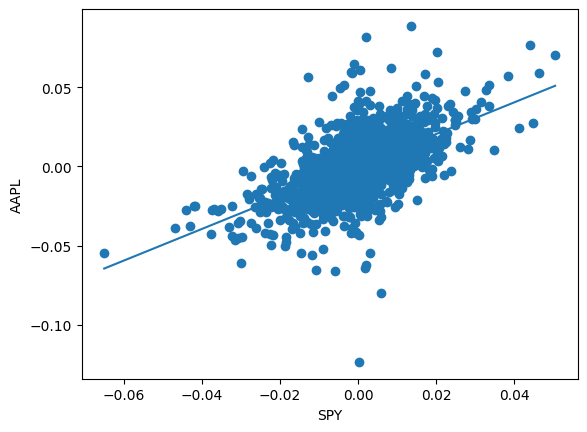

In [288]:
# Manual calculation
Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [289]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [290]:
X_predict

array([[-0.06512325],
       [-0.03621122],
       [-0.00729919],
       [ 0.02161284],
       [ 0.05052486]])